# 1 - Create Two Scenarios with Two Materials


This journal shows how to load the baselines and run the dynamic mas flow analysis, plotting the results for two scenarios and two materials.

### Step 1: Set Working Folder and Import PV DEMISE

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_DEMICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [2]:
import PV_DEMICE

### Step 2: Add Scenarios and Materials

``silicon`` and ``glass`` materials are added to the two simulations, along with a scenario, in this case the ``baseline_modules_US``. The baseline files for decadence scenario will be modified.


In [3]:
r1 = PV_DEMICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='standard', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['standard'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['standard'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv' )

r1.createScenario('decadence', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['decadence'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['decadence'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

path = C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


### Step 3: Modify Parameters in the Scenarios

We have some functions to create changes based on improvements, but for this example we'll just be modifying values for the full column and comparing effects.


In [4]:
#these were previously used to modify the glass baseline to immitate silicon
#but we now have a silicon baseline file to play with!
#r1.scenario['standard'].material['silicon'].materialdata['mat_virgin_eff'] = 30.0
#r1.scenario['standard'].material['silicon'].materialdata['mat_EOL_collected_Recycled'] = 40.0
#r1.scenario['standard'].material['silicon'].materialdata['mat_massperm2'] = 4


r1.scenario['decadence'].data['mod_lifetime'] = 35
r1.scenario['decadence'].material['glass'].materialdata['mat_virgin_eff'] = 70.0

r1.scenario['decadence'].material['silicon'].materialdata['mat_virgin_eff'] = 80.0
r1.scenario['decadence'].material['silicon'].materialdata['mat_EOL_collected_Recycled'] = 100.0
r1.scenario['decadence'].material['silicon'].materialdata['mat_massperm2'] = 22


### Step 4: Run the Mass Flow Calculations on All Scenarios and Materials

In [5]:
r1.calculateMassFlow()


Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  decadence
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


### Step 5: Use internal plotting functions to plot results

In [13]:
#pull out the keywords for choosing plots below
#print(r1.scenario.keys())
print(r1.scenario['standard'].material['glass'].materialdata.keys())

dict_keys(['standard', 'decadence'])
Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_modules_NotRecycled', 'mat_modules_NotCollected',
       'mat_EOL_sento_Recycling', 'mat_EOL_NotRecycled_Landfilled',
       'mat_EOL_Recycled', 'mat_EOL_Recycled_Losses_Landfilled',
       'mat_EOL_Recycled_2_HQ', 'mat_EOL_Recycled_2_OQ',
       'mat_EoL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_UsedinManufacturing', 'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto_Recycling', 'mat_MFG_Scrap_Landfilled',
       'mat_MFG_Scrap_Recycled_Successfully',
       'mat_MFG_Scrap_Recycled_Losses_Landfilled', 'mat_MFG_Recycled_into_HQ',
       'mat_MFG_R

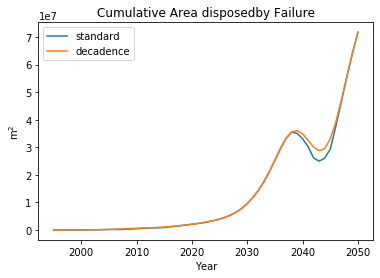

In [6]:
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')

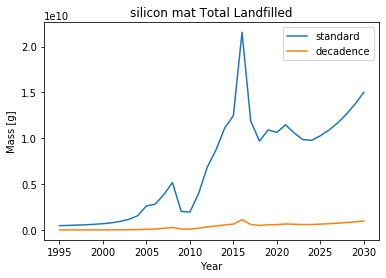

In [15]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')